# ENSO

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
from mom6_tools.enso import plot_enso_obs
import pickle
import cftime
import nc_time_axis
%matplotlib inline

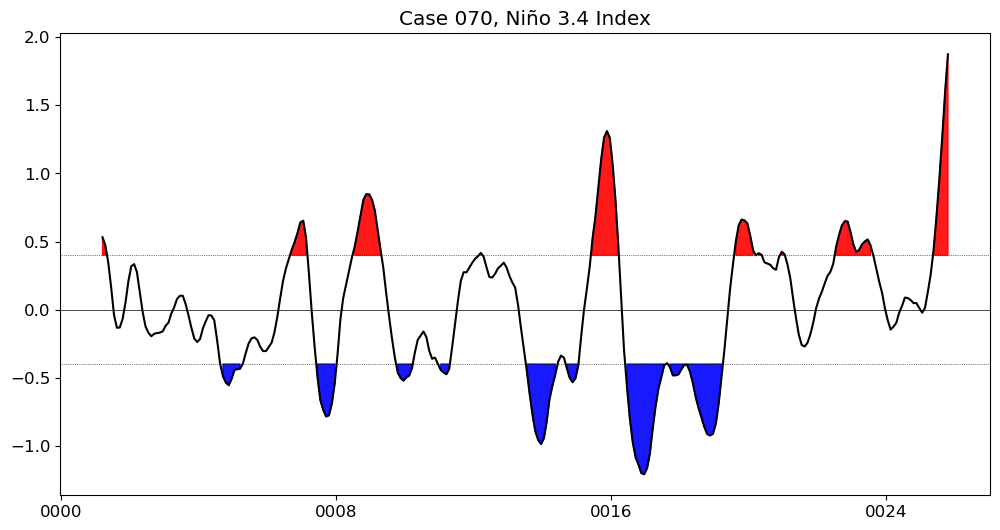

In [3]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds =  xr.open_dataset(path+case+'_nino34_index.nc')
  plot_enso(ds,label[i])

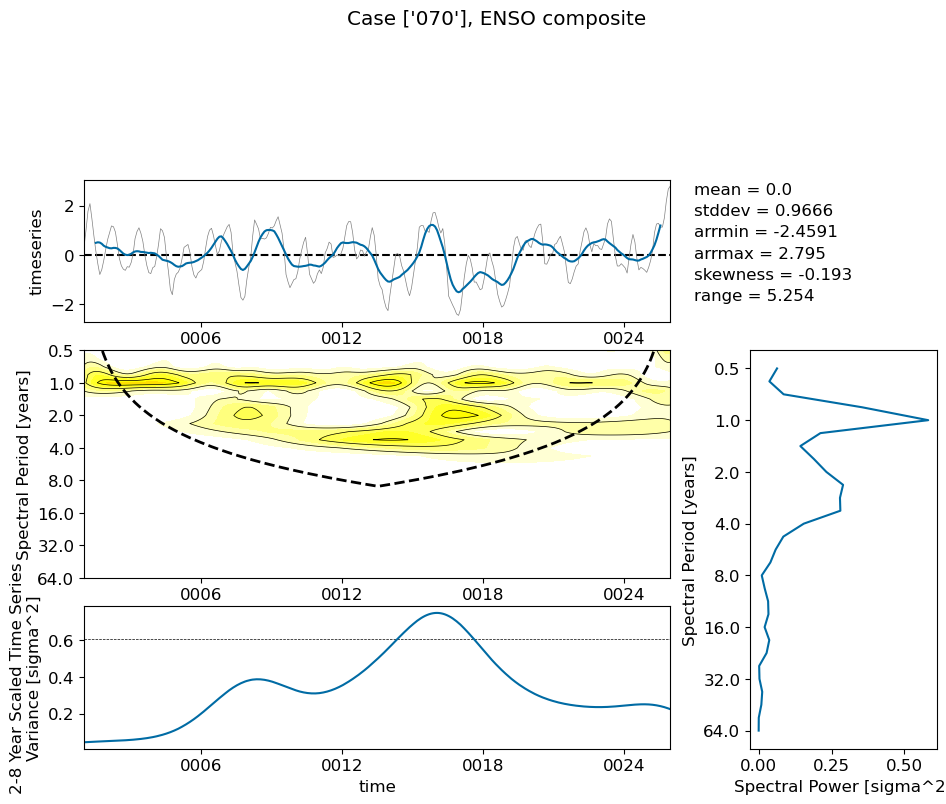

In [4]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  fname = path+case+'_nino34_composite.pkl'
  with open(fname, "rb") as file:
    loaded_obj = pickle.load(file)
    fig = loaded_obj.composite()
    plt.suptitle('Case {}, ENSO composite'.format(label));

## OiSSTv2

In [5]:
obs = xr.open_dataset('/glade/work/gmarques/cesm/tx2_3/oisst/oisstv2_to_tx2_3v2.nc')
#obs

In [6]:
# Add the areacellonew coordinate
obs = obs.assign_coords({
    "areacello": (("yh", "xh"), grd_xr[0].areacello.fillna(0.).data)
})
#obs

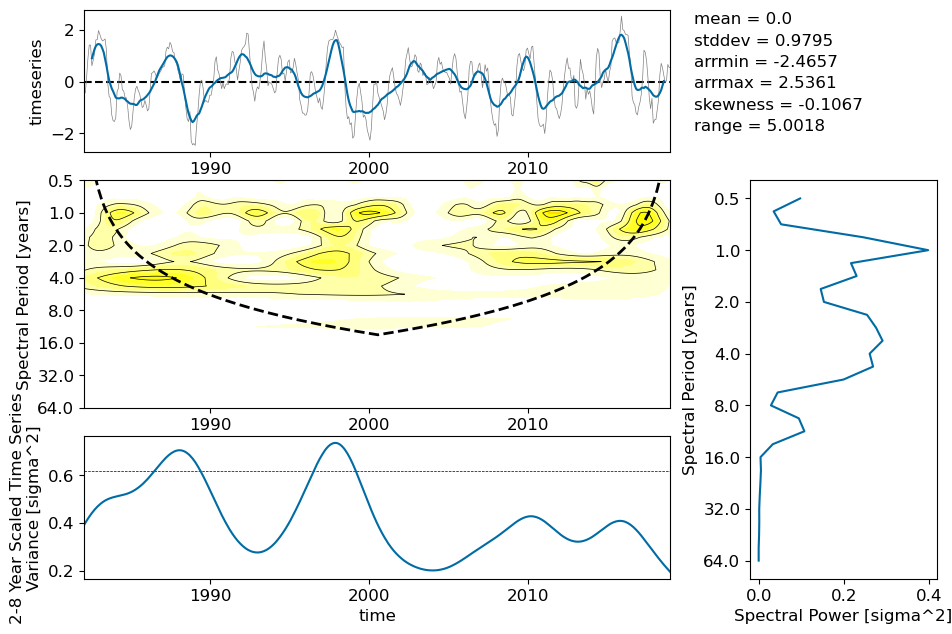

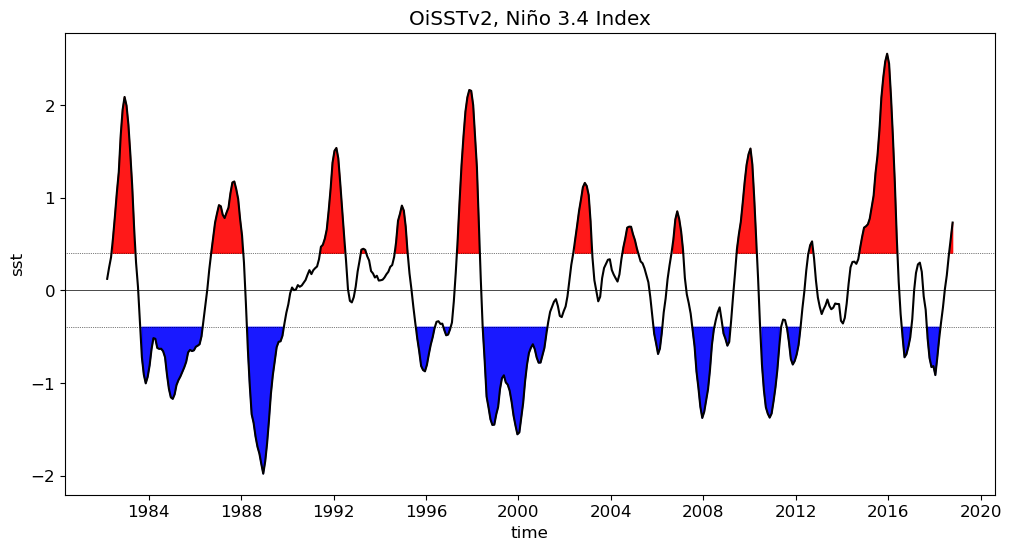

In [7]:
plot_enso_obs(obs)